## Machine Learning Lab Assignment - 7

**Author** - Tirth Modi (202201513)

In [25]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

<h5> <b> Loading Iris Dataset

In [26]:
# Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

<h4> <b> Question - 1: </b> </h4>
<p align='justify'> <b>Task:</b> Implement a simple artificial neural network (ANN) to classify the Iris dataset into its three species: Setosa, Versicolour, and Virginica Evaluate the model's performance using accuracy, precision, recall, and F1-score. </p>


In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, epochs=50, batch_size=5, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

1/1 [==============================] - 0s 54ms/step

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



<h4> <b> Question - 2: </b> </h4>
<p align='justify'> <b>Task:</b> Train a neural network classifier on the Iris dataset to predict the species of a flower based on its features (sepal length, sepal width, petal length, petal width). Evaluate the model using a confusion matrix and calculate accuracy, precision, recall, and F1-score. </p>

1/1 [==============================] - 0s 60ms/step

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



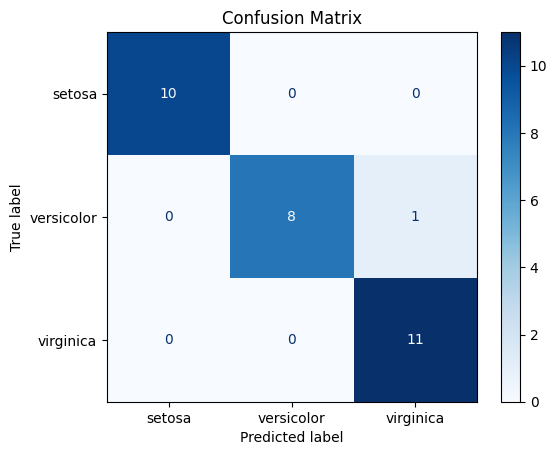

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_categorical, epochs=50, batch_size=5, verbose=0)
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nAccuracy:", accuracy)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


<h4> <b> Question - 3: </b> </h4>
<p align='justify'> <b>Task:</b> Perform multi-class classification on the Iris dataset using a neural network. Implement cross-validation to evaluate the model's performance and report accuracy, precision, recall, and F1-score. </p>

In [29]:
# Model-Building function for use in each fold
def build_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train_categorical = to_categorical(y_train, num_classes=3)
    y_test_categorical = to_categorical(y_test, num_classes=3)

    model = build_model(X.shape[1])
    model.fit(X_train, y_train_categorical, epochs=50, batch_size=5, verbose=0)
    y_pred = np.argmax(model.predict(X_test), axis=1)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print("\nAverage Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)

1/1 [==============================] - 0s 47ms/step

Average Accuracy: 0.9133333333333333
Average Precision: 0.9193073593073592
Average Recall: 0.9133333333333333
Average F1-score: 0.9124055236129539


#### Question 4: Logistic Regression
Consider the Iris dataset with sepal length and sepal width as the attributes, and Iris-Setosa as class c1, and the Virginica as class c2. There are n1 = 50 points in c1 and n2 = 100 points in c2.

Task: Train the logistic regression model and find the separating decision boundary and plot it. Do it from scratch without using a library.

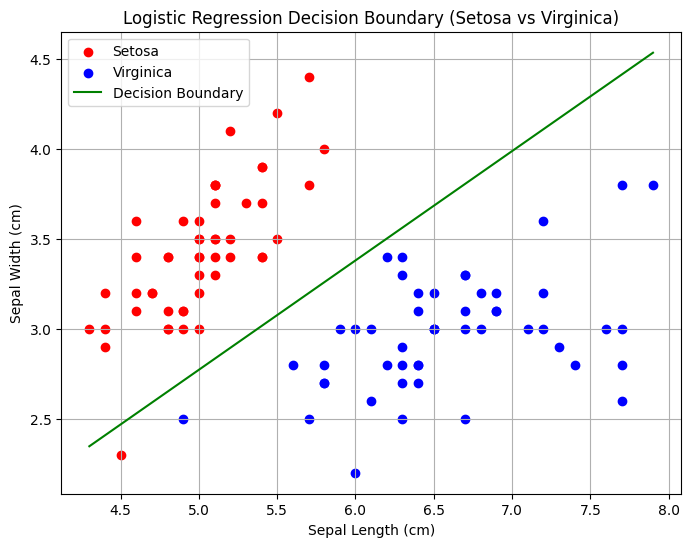

In [31]:

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Setosa (0) and Virginica (2)
iris_df = iris_df[iris_df['species'] != 1]

# Virginica (2) to 1 for binary classification
iris_df['species'] = iris_df['species'].replace(2, 1)

# Use only sepal length and sepal width as features
x = iris_df[['sepal length (cm)', 'sepal width (cm)']].values
y = iris_df['species'].values

# Add (Column of 1) to x
X_b = np.c_[np.ones((x.shape[0], 1)), x]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression
def logistic_regression(X, y, alpha=0.1, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    for i in range(iterations):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m
        w -= alpha * gradient
    return w

# Train the logistic regression model
w = logistic_regression(X_b, y, alpha=0.1, iterations=2000)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', label='Setosa')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', label='Virginica')

# Plot decision boundary
x_vals = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
decision_boundary = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, decision_boundary, color='green', label='Decision Boundary')

# Labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid()
plt.legend()
plt.title('Logistic Regression Decision Boundary (Setosa vs Virginica)')
plt.show()
